## Python
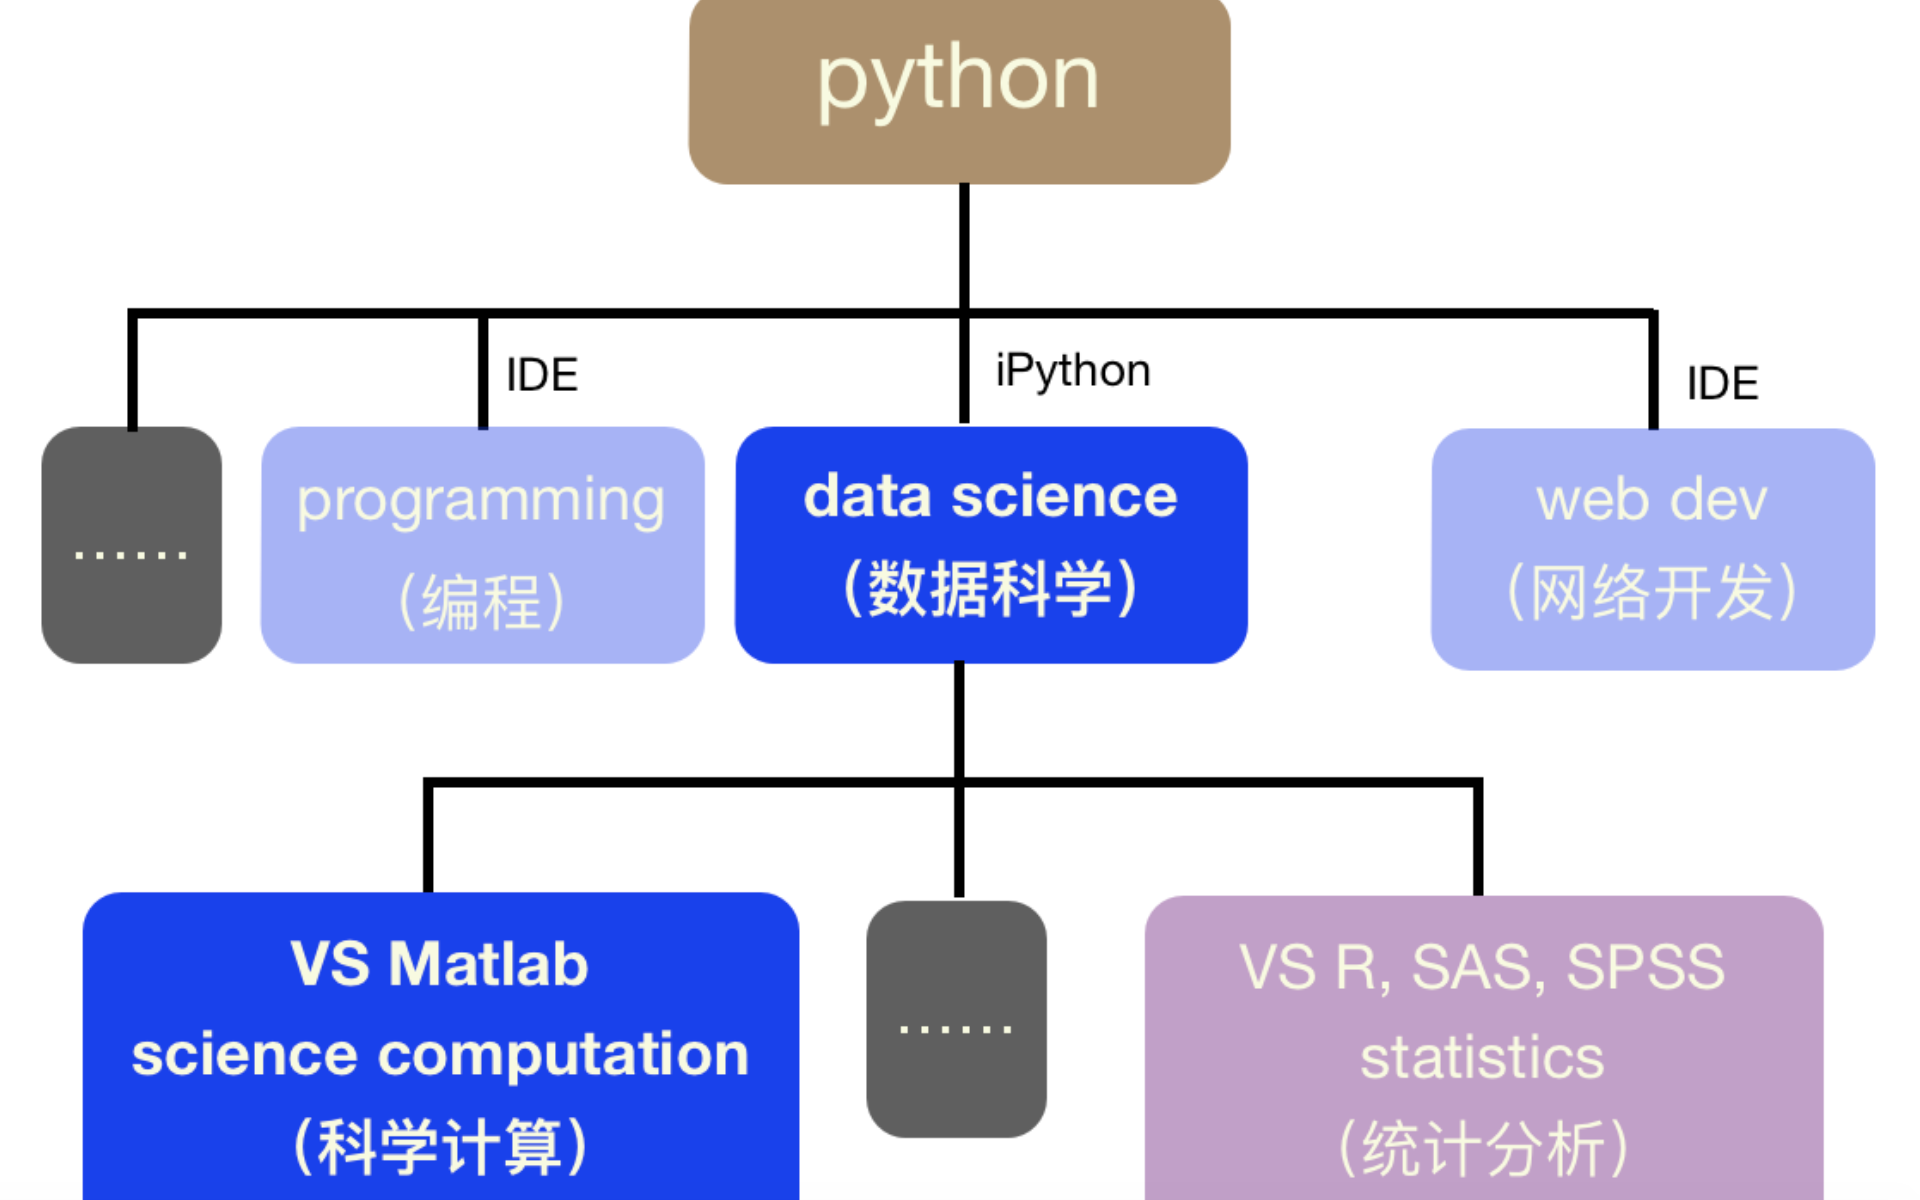

# 数据 
## homogeneous data：同质/同源数据
### >> 计算机模拟数据
## heterogeneous data：异质性数据
### >> heterogeneous data之：已经是“数据”的数据（e.g. HIS中出院患者信息）
### >> heterogeneous data之：看起来还不是“数据”的数据（e.g. 脑电图）

In [22]:
#准备工作：导入模块/软件库
#python和conda固有模块
import os #operating system模块
import numpy as np # 主要用于科学计算，可生成homogeneous数据，本例中用其生成易于展示图形，统计分析的数据
import pandas as pd # 用于导入数据，这些数据多为heterogeneous，是我们日常数据的主要形式
import matplotlib.pyplot as plt #matplotlib用于作图
from matplotlib.pylab import mpl

In [19]:
#以下模块，如果import不成功，则需要安装（通常在shell中通过pip install安装）
from scipy import stats # 用于统计分析
from scipy.stats import norm #正态分布
import seaborn as sns #seaborn用于高级制图，尤其是统计学用到的

import statsmodels.api as sm # 用于统计分析
import statsmodels.formula.api as smf # 用于统计分析

#以下模块可用于执行
from scipy import fftpack
from scipy.fftpack import fft, ifft #用于傅里叶转换
from scipy import signal

import mne #用于导入脑电图数据

In [23]:
# 设置显示模式（macOS）
%matplotlib osx

# pandas display option，调整显示r*w数
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号

In [27]:
# 生产50Hz+80Hz，时限为1s的signal
# sampling frequency
fs = 800
# time
T = 1.0
x = np.linspace(0.0, T, fs)
# 50Hz sine wave
signal50 = np.sin(50 * 2.0*np.pi*x)
# 80Hz sine wave
signal80 = 0.5 * np.sin(80.0 * 2.0*np.pi*x)
signal1 = signal50 + signal80
fourier_signal1 = fft(signal1)

#xf:0-400, size=300
xf = np.linspace(0.0, fs/(T*2), fs//2)

#作图
fig, ax = plt.subplots(4,1, figsize=(18,12))
ax[0].plot(x, signal50, 'b', label='50Hz正弦波')
ax[0].legend()
ax[1].plot(x, signal80, 'r', label='80Hz正弦波')
ax[1].legend()
ax[2].plot(x, signal1, 'o-', label='50Hz+80Hz正弦波')
ax[2].set_title('time domain')
ax[2].legend()
ax[3].plot(xf, 2.0/fs * np.abs(fourier_signal1[0:fs//2]))
ax[3].set_title('frequecy domain')
ax[3].grid()

## 认识时域和频域 --> 时域
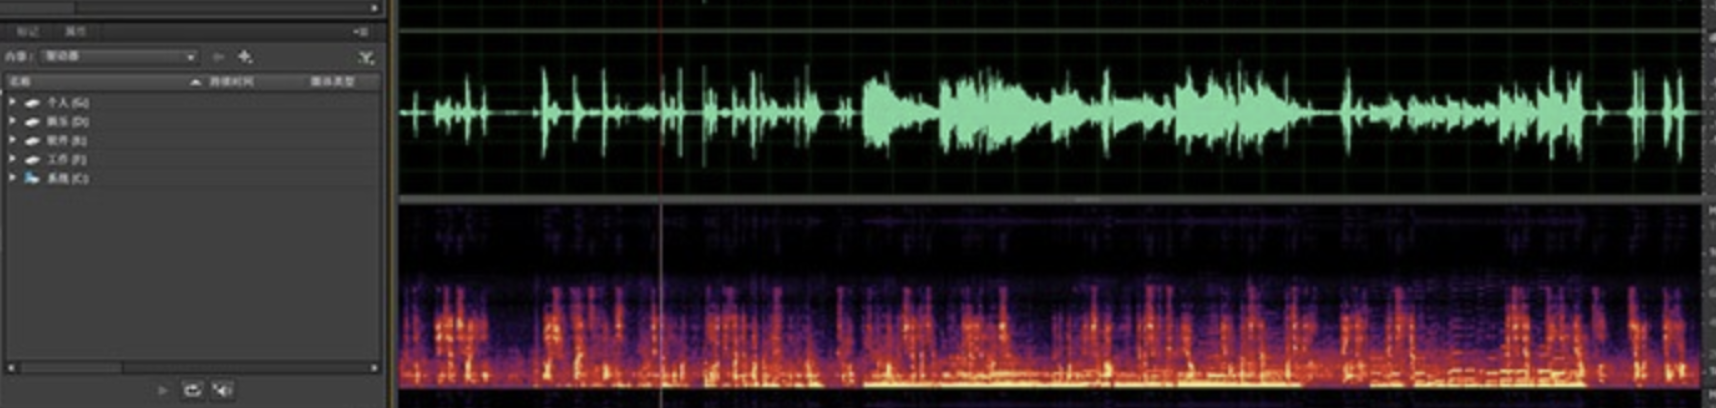

## 认识时域和频域 --> 频域
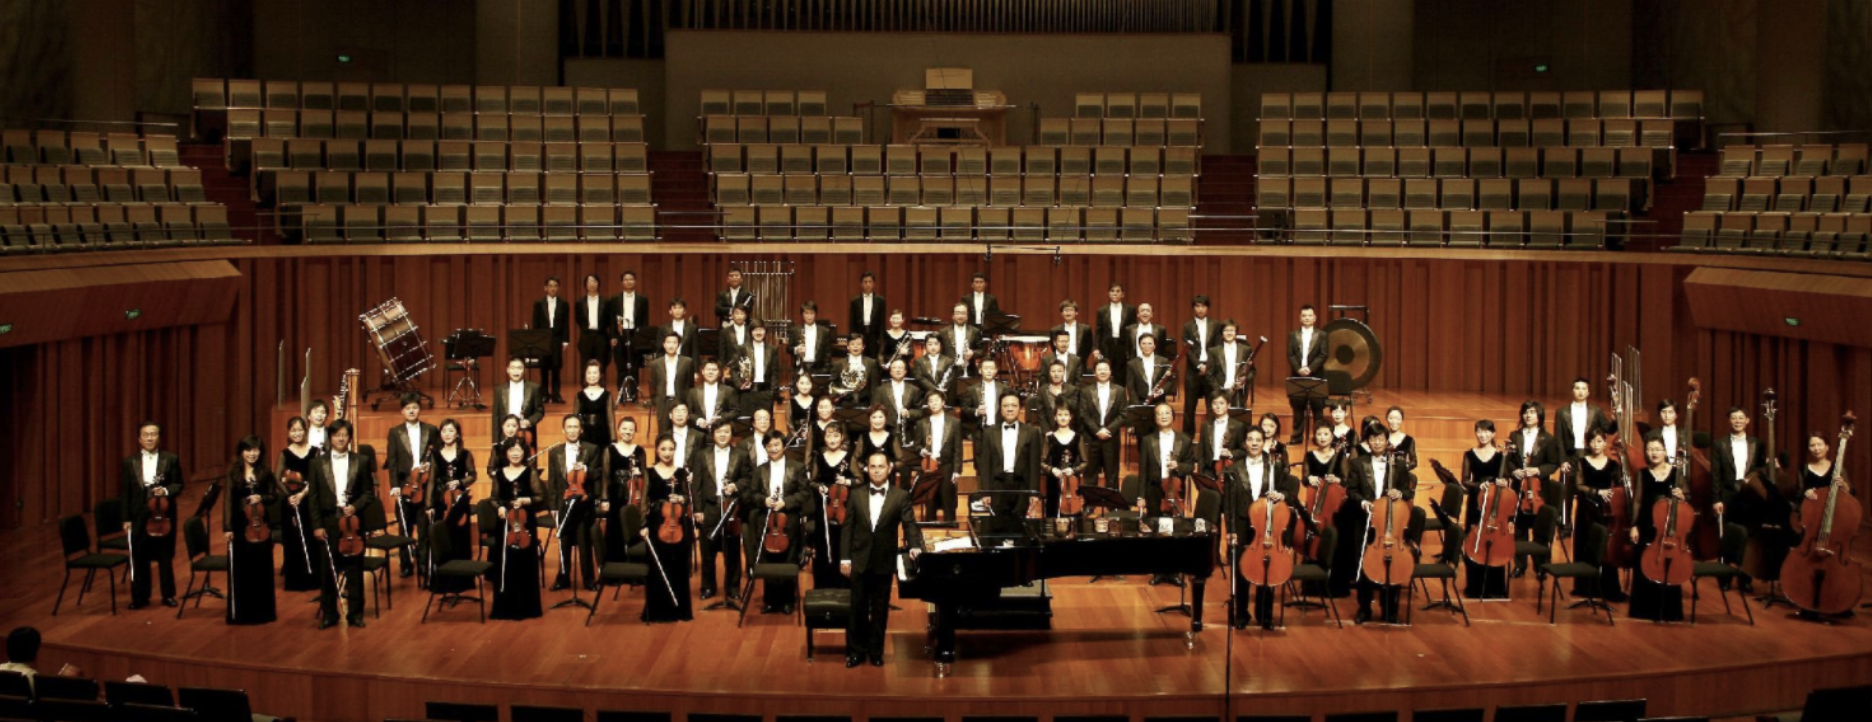

### >> heterogeneous data之：已经是“数据”的数据-->HIS中出院患者信息

In [32]:
# 读入HIS data. 
discharge = pd.read_excel('/Users/yqzhang/Desktop/Meeting/20201014_CI_python/Neuro_Discharged_2018.xls',
                         convert_missing=False) 

In [33]:
discharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50205 entries, 0 to 50204
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   出院科室    50205 non-null  object        
 1   住院号     50205 non-null  object        
 2   年龄      50205 non-null  int64         
 3   患者来源    50205 non-null  object        
 4   诊断类型    50205 non-null  object        
 5   诊断编码    49725 non-null  object        
 6   诊断名称    50204 non-null  object        
 7   入院日期    50205 non-null  datetime64[ns]
 8   出院日期    50205 non-null  datetime64[ns]
 9   住院天数    50205 non-null  int64         
 10  非药费     50205 non-null  float64       
 11  药费      49809 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 4.6+ MB


In [34]:
## 修改变量名，单个修改：df.rename(columns = {'sex':'Sex'})
discharge.columns=['department', 'IPD_ID', 'age', 'adm_site', 'diag_type', 'ICD',
             'diagnosis', 'adm_DT', 'dis_DT', 'stay_days', 'nondrug_fee', 'drug_fee']

In [35]:
discharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50205 entries, 0 to 50204
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   department   50205 non-null  object        
 1   IPD_ID       50205 non-null  object        
 2   age          50205 non-null  int64         
 3   adm_site     50205 non-null  object        
 4   diag_type    50205 non-null  object        
 5   ICD          49725 non-null  object        
 6   diagnosis    50204 non-null  object        
 7   adm_DT       50205 non-null  datetime64[ns]
 8   dis_DT       50205 non-null  datetime64[ns]
 9   stay_days    50205 non-null  int64         
 10  nondrug_fee  50205 non-null  float64       
 11  drug_fee     49809 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 4.6+ MB


## 作图
### 对单个变量作图
    1. bar
    2. line
    3. area
    4. histogram（直方图）
### 对两个或多个变量作图
    1.scatter(散点图): 两个连续型变量
    2.box or bar: 一个连续型变量 by 一个分类变量： 第四部分有示例
    3.cross table：两个分类变量: 第四部分有示例

In [36]:
# 直方图，住院日
fig, ax = plt.subplots(figsize=(18, 8))

ax.hist(discharge['stay_days'], density=True, bins=100)

(array([1.80945367e-02, 9.06898998e-02, 6.01361578e-02, 2.04347361e-02,
        8.00012131e-03, 3.45497042e-03, 1.54100697e-03, 8.23782984e-04,
        9.18046708e-04, 3.72956475e-04, 3.07381710e-04, 3.07381710e-04,
        2.25413254e-04, 6.96731877e-05, 1.14755839e-04, 0.00000000e+00,
        5.32794965e-05, 6.55747649e-05, 0.00000000e+00, 2.04921140e-05,
        4.09842280e-05, 4.50826508e-05, 0.00000000e+00, 2.86889596e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [13]:
discharge.describe()

age     stay_days    nondrug_fee       drug_fee
count  37461.000000  37461.000000   37461.000000   37145.000000
mean      65.948613     11.468434    8892.969378    7348.012276
std       13.837481      9.421987   15668.153405   10674.668592
min        3.000000      0.000000      36.000000       0.000000
25%       59.000000      7.000000    4161.400000    2460.160000
50%       67.000000     10.000000    5678.300000    4487.910000
75%       76.000000     14.000000    8096.510000    8272.640000
max      103.000000    486.000000  510011.300000  196833.110000

In [16]:
# 删除住院日>30天的行
discharge = discharge[discharge.stay_days < 30]
# 直方图，住院日
fig, ax = plt.subplots(figsize=(18, 8))

ax.hist(discharge['stay_days'], density=True, bins=30)

(array([0.00019892, 0.0151177 , 0.00940594, 0.0195223 , 0.033617  ,
        0.05492955, 0.07499176, 0.1124166 , 0.10045315, 0.0937468 ,
        0.08763721, 0.07172383, 0.06515957, 0.05743022, 0.05257096,
        0.04151685, 0.02611498, 0.02168197, 0.01585654, 0.01386737,
        0.01361162, 0.01059944, 0.00795669, 0.00835452, 0.00588226,
        0.00656427, 0.00284167, 0.00179025, 0.00437618, 0.00454668]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <a list of 30 Patch objects>)

In [134]:
discharge = discharge[discharge.nondrug_fee < 100000]

In [135]:
# 对“住院日-非药费”作图
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(discharge['stay_days'], discharge['nondrug_fee'])

In [133]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0, 0].hist(discharge['stay_days'], density=True, bins=30)
ax[1, 1].scatter(discharge['stay_days'], discharge['nondrug_fee'])

In [28]:
# 对“住院日-非药费”作图，使用SNS scatterplot
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.scatterplot(x='stay_days', y='nondrug_fee', data=discharge)

In [145]:
# 对“住院日-非药费”作图，使用SNS lmplot
sns.lmplot(x='stay_days', y='nondrug_fee', data=discharge)

In [144]:
#OLS(ordinary least squares)回归分析
ols_nondrug_fee_stay = smf.ols('drug_fee ~ age', data=discharge).fit()
print(ols_nondrug_fee_stay.summary())

                            OLS Regression Results                            
Dep. Variable:               drug_fee   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     433.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.32e-95
Time:                        18:46:56   Log-Likelihood:            -3.6538e+05
No. Observations:               36051   AIC:                         7.308e+05
Df Residuals:                   36049   BIC:                         7.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2923.8682    160.319     18.238      0.0

In [29]:
# pair plot 相关数据
sns.pairplot(x_vars=['age', 'stay_days', 'drug_fee'], 
             y_vars='nondrug_fee', data=discharge, size=8, aspect=0.7)

/Users/yqzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


### >> heterogeneous data之：看起来还不是“数据”的数据 --> 脑电图

In [30]:
# 读取脑电图数据
raw = mne.io.read_raw_edf('/Users/yqzhang/Desktop/Meeting/20201014_CI_python/EEG_nl.edf')

Extracting EDF parameters from /Users/yqzhang/Desktop/Meeting/20201014_CI_python/EEG_nl.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/Users/yqzhang/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 181 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yqzhang/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 181 missing from current font.
  font.set_text(s, 0, flags=flags)


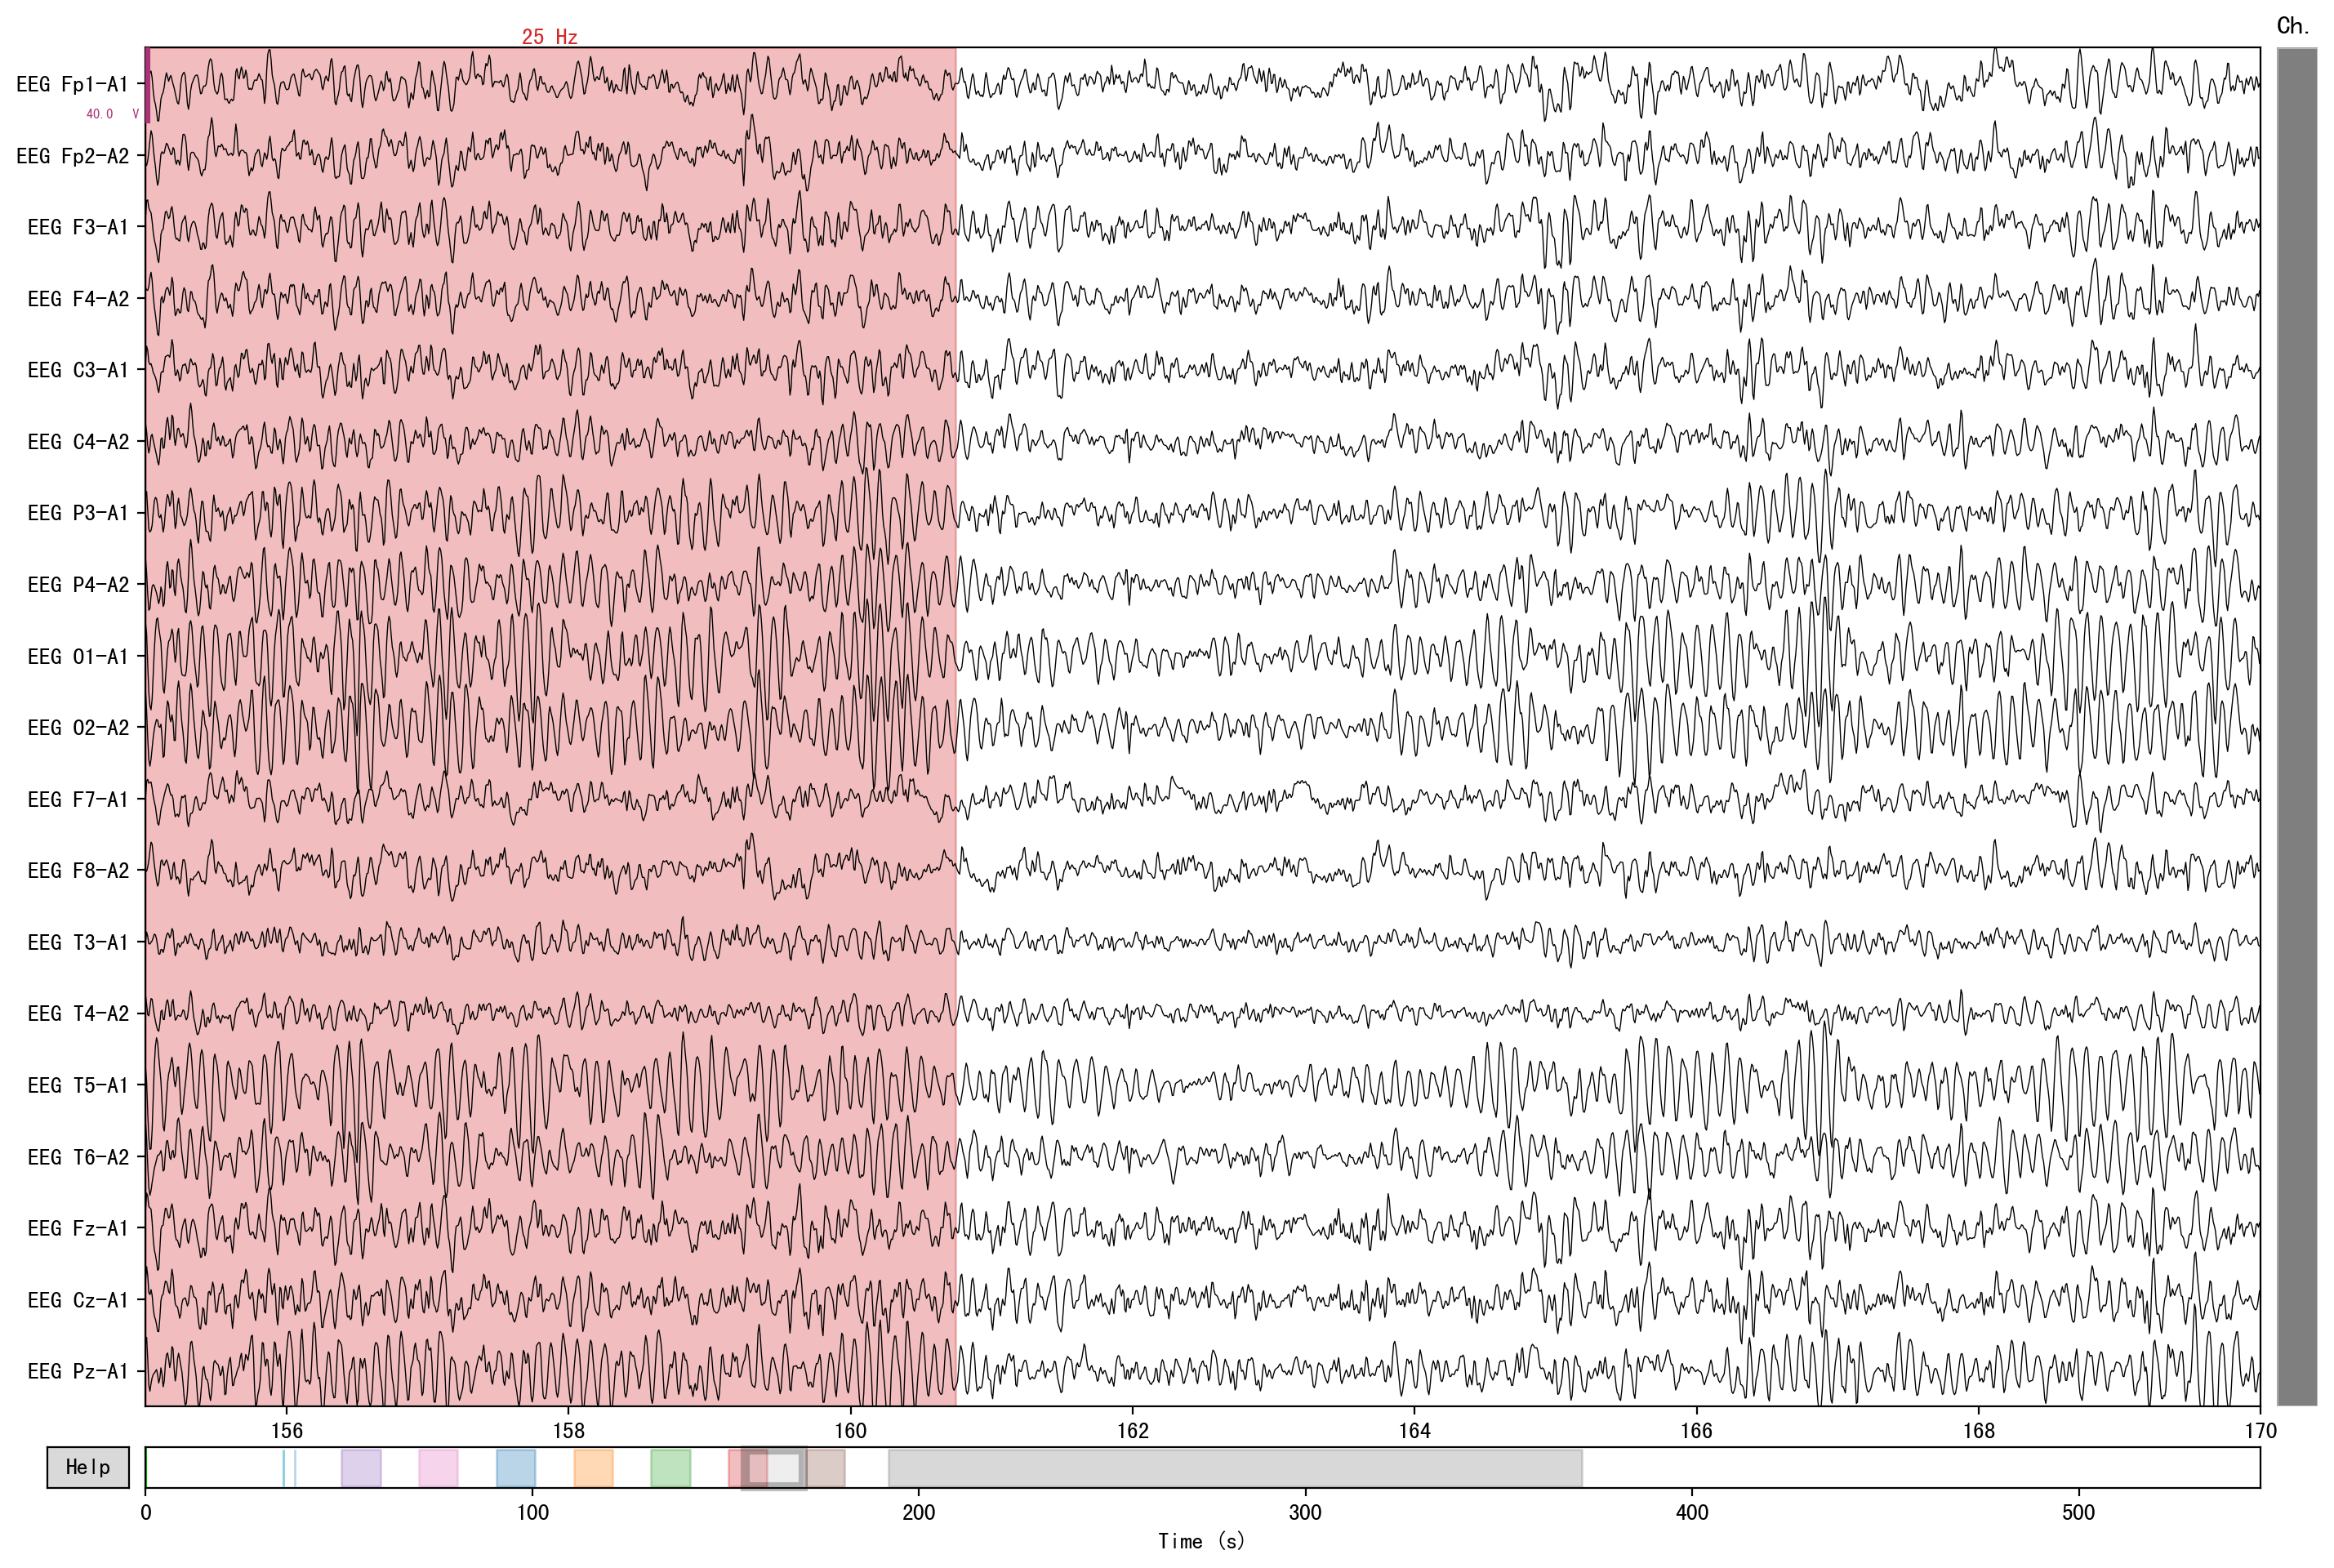

In [31]:
# 显示19导联的所有数据
raw.plot(start=155, duration=15, remove_dc=True)